In [2]:
import pandas as pd

import sys
sys.path.insert(1, '../../scripts/')
from s3_support import *
%matplotlib inline

In [15]:
# matomo
q = '''select
            date_trunc('day', timestamp) as date,
            count(distinct(visitorid)) as matomo_views
        from matomo_traffic
        group by date_trunc('day', timestamp)'''
matomo = redshift_query_read(q, schema='production')
matomo.drop_duplicates(inplace=True)

In [16]:
min_date = matomo['date'].min()
max_date = matomo['date'].max()

In [17]:
# GA traffic
q = '''select
            date,
            sum(views) as ga_views
        from googleanalytics_traffic
        where 
            date>='{}' and
            date<='{}'
        group by date'''.format(min_date, max_date)
ga = redshift_query_read(q, schema='production')
ga.drop_duplicates(inplace=True)

In [18]:
traf = ga.merge(matomo, on='date')
traf.sort_values('date', ascending=True, inplace=True)

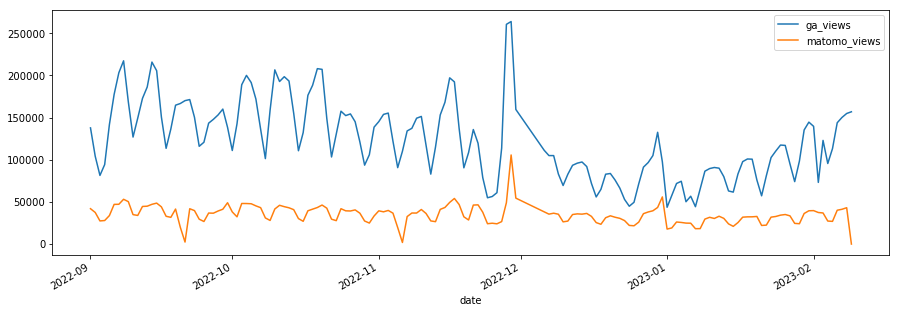

In [19]:
traf.plot(x='date', y=['ga_views', 'matomo_views'], figsize=(15,5))

In [20]:
traf.tail(9)

,date,ga_views,matomo_views
52,2023-02-01,139682,39702
68,2023-02-02,73175,37454
99,2023-02-03,122993,36906
39,2023-02-04,95598,27318
109,2023-02-05,113282,26943
122,2023-02-06,143944,40163
148,2023-02-07,150200,41273
59,2023-02-08,154931,43136
121,2023-02-09,156965,2


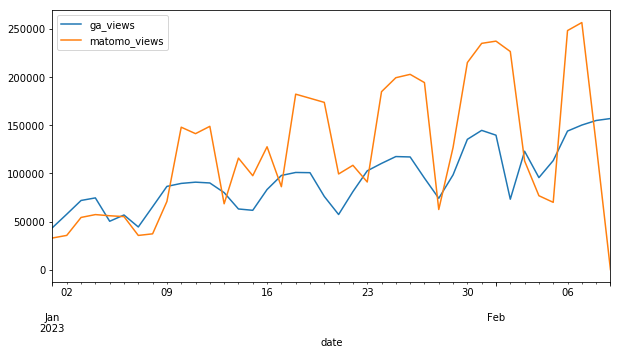

In [17]:
traf[traf['date']>='2023-01-01'].plot(x='date', y=['ga_views', 'matomo_views'], figsize=(10,5))

In [18]:
traf['month'] = traf['date'].dt.month
traf.groupby('month')[['ga_views', 'matomo_views']].sum()

,ga_views,matomo_views
month,,
1,2618379,3622283
2,1150770,1359042
9,4588711,3163732
10,4824523,3555965
11,4017237,3156181
12,2179299,1786319


# scratch

checking duplicates

In [12]:
# matomo
q = '''select
            *
        from matomo_traffic
        where timestamp>='2023-02-01' '''
m_feb = redshift_query_read(q, schema='production')

In [13]:
"{:,}".format(len(m_feb[m_feb['timestamp'].dt.date.astype(str)=='2023-02-01']))
"{:,}".format(len(m_feb[m_feb['timestamp'].dt.date.astype(str)=='2023-02-01'].drop_duplicates()))

'118,682'

In [14]:
m_feb.head()

,id,ip,visitorid,visitduration,actions,referrertype,referrername,devicetype,devicebrand,devicemodel,operatingsystemname,browser,url,timespent,pageviewposition,timestamp,org,form
0,7029712,40.94.26.168,8805475b5366de97,0,1,direct,None,Desktop,Unknown,Generic Desktop,Windows,Chrome 104.0,file:///C:/Users/eadams/AppData/Local/Microsof...,0,1,2023-02-07 17:26:04,0,0
1,7059055,170.203.139.110,5ff0ca5eaddebc7d,157,2,direct,None,Desktop,Apple,Generic Desktop,Mac,Chrome 109.0,file:///Users/bengrubert/Desktop/2022 TAX PREP...,156,1,2023-02-08 11:36:07,0,0
2,6976491,40.64.64.90,8776df154452a947,14,4,direct,None,Desktop,Unknown,Generic Desktop,Windows,Chrome 81.0,file:///tmp/tmplpoasvmd.htm,3,3,2023-02-06 15:22:24,0,0
3,6976491,40.64.64.90,8776df154452a947,14,4,direct,None,Desktop,Unknown,Generic Desktop,Windows,Chrome 81.0,file:///tmp/tmplpoasvmd.htm,3,3,2023-02-06 15:22:24,0,0
4,6869311,54.189.71.192,6318e0fbace694ba,0,1,direct,None,Desktop,Apple,Generic Desktop,Mac,Chrome 97.0,https://2022.prayerjourney.global/event/pj/,0,1,2023-02-03 14:15:50,0,0
